# PROJETO 03 - BigData Python com Spark

# Santander Customer Satisfaction

# Relatório destinado a explicação do projeto a um Cientista de Dados, não ao Cliente Santander
# Utilizada a linguagem de programação Python e o Microsoft Azure Machine Learning para tratamento dos dados
# e criação do modelo preditivo de Machine Learning

# ANÁLISE EXPLORATÓRIA

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.shape

(76020, 371)

In [4]:
# Posibilitar a leitura de todas as colunas
pd.set_option('display.max_columns', None)

In [5]:
# Exclusão da variável ID que não traz informação relevante
df = df.drop(columns = 'ID')

In [6]:
df.head(5)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte

In [7]:
est = df.describe()
est

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte

# Análise do valor mínimo, máximo e quantidade distinta de cada variável

In [8]:
min = est.iloc[3]
max = est.iloc[7]
min_df = pd.DataFrame(min)
max_df = pd.DataFrame(max)
min_df["var"] = min_df.index
max_df["var"] = max_df.index
res = pd.merge(min_df,max_df, on='var')
cont = []
for i in df.columns:
    c = df.groupby(i)[i].nunique().count()
    cont.append(c)
cont_df = pd.DataFrame(cont)
cont_df['var'] = res['var']
res = pd.merge(res,cont_df, on='var')
res.index = res['var']
res = res.drop(columns=['var'])
res.columns = ['min', 'max', 'quantidade']
res.head(10)

,min,max,quantidade
var,,,
var3,-999999.0,238.00,208
var15,5.0,105.00,100
imp_ent_var16_ult1,0.0,210000.00,596
imp_op_var39_comer_ult1,0.0,12888.03,7551
imp_op_var39_comer_ult3,0.0,21024.81,9099
imp_op_var40_comer_ult1,0.0,8237.82,293
imp_op_var40_comer_ult3,0.0,11073.57,346
imp_op_var40_efect_ult1,0.0,6600.00,23
imp_op_var40_efect_ult3,0.0,6600.00,29


# Excluímos as variáveis que têm apenas um valor pois são irrelevantes
# Quantidade de variáveis passou de 371 para 336

In [9]:
filtro = res['quantidade'] == 1
res2 = res[filtro]
list_col = res2.index
for i in list_col:
    df = df.drop(columns = i)
df.shape

(76020, 336)

# Verificação da distribuição da variável alvo TARGET
# Será necessário balancear posteriormente com a técnica SMOTE no AzureML

In [10]:
target = df.groupby(['TARGET']).size()
target

TARGET
0    73012
1     3008
dtype: int64

# Análise de correlação

In [11]:
pd.set_option('display.max_rows', None)
cor = df[df.columns].corrwith(df.TARGET)
for i in range(0, len(cor)):
    cor[i] = abs(cor[i])
cor_df = pd.DataFrame(cor)

In [14]:
# Descarte das variáveis com correlação < 0.002184 (68,6 vezes menor que a variável de maior correlação ind_var30)
# Quantidade de variáveis passou de 336 para 215

In [13]:
cor_df_ord = cor_df.sort_values(by=0)
descarte = cor_df_ord.loc['imp_ent_var16_ult1':'num_var1_0'].index
for i in descarte:
    df = df.drop(columns = i)
cor_df_ord = cor_df_ord.loc['num_var1_0':'ind_var30']
cor_df_ord.shape

(215, 1)

In [15]:
# Análise das variáveis que têm uma distribuição contínua - 43 variáveis

In [17]:
tab = df.describe()
tab

,var3,var15,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,ind_var1,ind_var5_0,ind_var5,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var33_0,ind_var33,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40,ind_var41_0,ind_var39,ind_var44_0,ind_var44,num_var1,num_var4,num_var5_0,num_var5,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13,num_var14_0,num_var14,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var41_hace2,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_ult1,num_op_var39_ult3,num_var30_0,num_var30,num_var31_0,num_var31,num_var33_0,num_var33,num_var35,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,saldo_var5,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13,saldo_var14,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var30,saldo_var33,saldo_var37,saldo_var40,saldo_var42,saldo_var44,var36,delta_imp_aport_var13_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_venta_var44_1y3,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var33_hace3,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_reemb_var17_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,ind_var10_ult1,ind_var10cte_ult1,ind_var9_cte_ult1,ind_var9_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1,var21,num_aport_var13_hace3,num_aport_var13_ult1,num_aport_var17_hace3,num_aport_var17_ult1,num_aport_var33_hace3,num_compra_var44_hace3,num_compra_var44_ult1,num_ent_var16_ult1,num_var22_hace2,num_var22_hace3,num_var22_ult1,num_var22_ult3,num_med_var22_ult3,num_meses_var5_ult3,num_meses_var8_ult3,num_meses_var12_ult3,num_meses_var13_corto_ult3,num_meses_var13_largo_ult3,num_meses_var17_ult3,num_meses_var33_ult3,num_meses_var39_vig_ult3,num_meses_var44_ult3,num_op_var39_comer_ult1,num_op_var39_comer_ult3,num_op_var40_comer_ult3,num_op_var40_efect_ult1,num_op_var40_efect_ult3,num_op_var41_comer_ult1,num_op_var41_comer_ult3,num_op_var41_efect_ult1,num_op_var41_efect_ult3,num_op_var39_efect_ult1,num_op_var39_efect_ult3,num_reemb_var17_ult1,num_sal_var16_ult1,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_venta_var44_ult1,num_var45_hace3,num_var45_ult1,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.00000

In [18]:
col_continua = []
max = tab.iloc[7]
j = 0
c = 0
for i in max:
    if(i - round(i)) != 0:
        col_continua.append(max.index[j])
        c = c + 1
    j = j + 1
print(c)

43


In [19]:
col_continua

['imp_op_var39_comer_ult1',
 'imp_op_var39_comer_ult3',
 'imp_op_var40_comer_ult1',
 'imp_op_var40_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_ult1',
 'imp_op_var39_ult1',
 'saldo_var5',
 'saldo_var12',
 'saldo_var20',
 'saldo_var24',
 'saldo_var26',
 'saldo_var25',
 'saldo_var30',
 'saldo_var33',
 'saldo_var40',
 'saldo_var42',
 'saldo_var44',
 'imp_compra_var44_hace3',
 'imp_reemb_var17_ult1',
 'saldo_medio_var5_hace2',
 'saldo_medio_var5_hace3',
 'saldo_medio_var5_ult1',
 'saldo_medio_var5_ult3',
 'saldo_medio_var8_hace2',
 'saldo_medio_var8_hace3',
 'saldo_medio_var8_ult1',
 'saldo_medio_var12_hace2',
 'saldo_medio_var12_hace3',
 'saldo_medio_var12_ult1',
 'saldo_medio_var12_ult3',
 'saldo_medio_var13_corto_hace3',
 'saldo_medio_var13_largo_ult3',
 'saldo_medio_var33_hace2',
 'saldo_medio_var33_hace3',
 'saldo_medio_var33_ult1',
 'saldo_medio_var33_ult3',
 'saldo_medio_var44_hace2',
 'saldo_medio_var44_hace3',
 'saldo_medio_var44_ult1',
 'saldo_med

In [20]:
import seaborn as sns

C:\Paulo\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


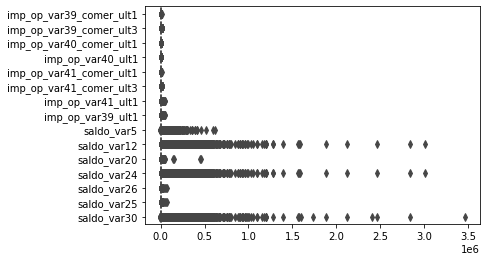

In [21]:
sns.boxplot(data = df[col_continua[0:15]],orient = "h")

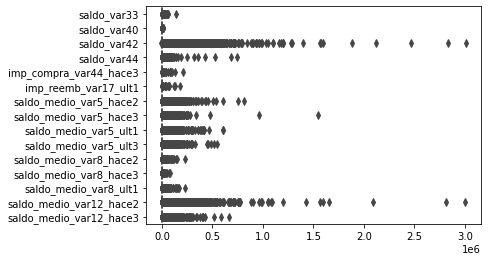

In [22]:
sns.boxplot(data = df[col_continua[15:30]],orient = "h")

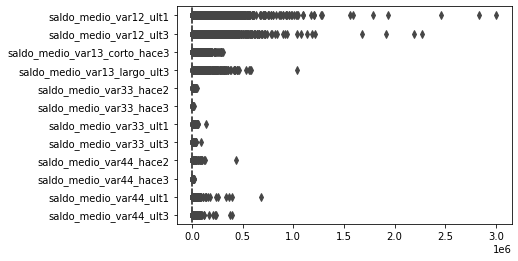

In [23]:
sns.boxplot(data = df[col_continua[30:42]],orient = "h")

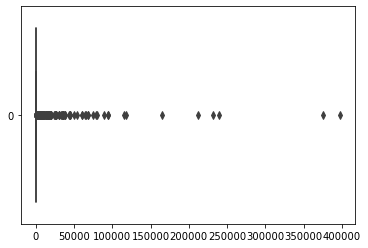

In [24]:
sns.boxplot(data = df[col_continua[41]],orient = "h")

In [25]:
# Salva df para continuidade da análise exploratória no Azure ML
df.to_csv('train_df.csv')

In [26]:
# Efetuados os seguintes tratamentos no Azure ML
# Clip Values - ClipPeaks no percentil 90 nas 43 variáveis contínuas
# Excluídas 28 dessas variáveis por apresentarem menos de 3 valores distintos após o Clip Values
# Binarização em 10 classes nas 15 variáveis contínuas restantes
# SMOTE para balanceamento da variável TARGET em 54% e 46%

In [27]:
# Resultado das transformações no Azure ML ==> Quantidade de variáveis diminuiu para 187
dados = pd.read_csv('train_Azure.csv')
dados.shape

(136180, 187)

# Normalizando os dados

In [28]:
from sklearn.preprocessing import Normalizer
array = dados.values
X = array[:,0:186]
Y = array[:,186]
scaler = Normalizer()
normalizedX = scaler.fit_transform(X)

# Principal Component Analysis (PCA)

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)
# Seleção de atributos
pca = PCA(n_components = 9)
fit = pca.fit(rescaledX)
principalComponents = pca.fit_transform(rescaledX)
# Sumarizando os componentes
print("Variância: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Variância: [0.3960708  0.15632492 0.06817586 0.06591931 0.04831483 0.03969041
 0.02929279 0.02214141 0.02088648]
[[ 3.41623985e-04  1.40083707e-03  1.21713035e-01 ...  2.95784493e-05
   1.51306181e-04  1.39321141e-02]
 [ 2.71204948e-04  2.66457172e-02  2.27644833e-01 ... -4.02986153e-05
  -2.02348949e-04 -9.09314611e-03]
 [ 1.19402521e-04  1.95906221e-02 -2.35208816e-01 ...  2.94286275e-04
   6.11943075e-04  2.11041930e-02]
 ...
 [ 4.63213510e-05  2.06774827e-02 -3.49944951e-02 ... -7.60403012e-04
  -1.35620109e-03  4.15328504e-02]
 [ 1.01637283e-03  3.42354848e-02 -3.63946311e-02 ... -7.47627915e-05
   3.21698642e-04  3.17550512e-01]
 [ 1.64315269e-03  4.38722495e-02 -3.24624971e-02 ... -1.89230825e-04
  -2.55409041e-04 -9.17656936e-01]]


# Performance dos Algoritmos

# LogisticRegression

In [30]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# Separando o array em componentes de input e output
X = principalComponents
Y = array[:,186]
# Definindo os valores para o número de folds
num_folds = 10
seed = 7
# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)
# Criando o modelo
modelo = LogisticRegression()
# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
resultado2 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'roc_auc')
# Print dos resultados
print("Acurácia: %.3f" % (resultado.mean() * 100))
print("ROC: %.3f" % (resultado2.mean() * 100))


Acurácia: 69.197
ROC: 74.431


# Linear Discriminant Analysis

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Criando o modelo
modelo = LinearDiscriminantAnalysis()
# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
resultado2 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'roc_auc')
# Print dos resultados
print("Acurácia: %.3f" % (resultado.mean() * 100))
print("ROC: %.3f" % (resultado2.mean() * 100))

Acurácia: 69.251
ROC: 74.393


# KNN - K-Nearest Neighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier
# Criando o modelo
modelo = KNeighborsClassifier()
# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
resultado2 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'roc_auc')
# Print dos resultados
print("Acurácia: %.3f" % (resultado.mean() * 100))
print("ROC: %.3f" % (resultado2.mean() * 100))

Acurácia: 85.325
ROC: 91.630


# Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
# Criando o modelo
modelo = GaussianNB()
# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
resultado2 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'roc_auc')
# Print dos resultados
print("Acurácia: %.3f" % (resultado.mean() * 100))
print("ROC: %.3f" % (resultado2.mean() * 100))

Acurácia: 60.617
ROC: 70.520


# CART (Classification and Regression Trees)

In [34]:
from sklearn.tree import DecisionTreeClassifier
# Criando o modelo
modelo = DecisionTreeClassifier()
# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
resultado2 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'roc_auc')
# Print dos resultados
print("Acurácia: %.3f" % (resultado.mean() * 100))
print("ROC: %.3f" % (resultado2.mean() * 100))

Acurácia: 85.602
ROC: 88.123


# Algoritmo XGBoost - Extreme Gradient Boosting

In [35]:
from xgboost import XGBClassifier
# Criando o modelo
modelo = XGBClassifier()
# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
resultado2 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'roc_auc')
# Print dos resultados
print("Acurácia: %.3f" % (resultado.mean() * 100))
print("ROC: %.3f" % (resultado2.mean() * 100))

Acurácia: 83.552
ROC: 91.087


# Bagged Decision Trees

In [36]:
from sklearn.ensemble import BaggingClassifier
# Definindo os valores para o número de folds
num_folds = 10
# Separando os dados em folds
kfold = KFold(num_folds, True)
# Cria o modelo unitário (classificador fraco)
cart = KNeighborsClassifier()
# Definindo o número de trees
num_trees = 100
# Criando o modelo bagging
modelo = BaggingClassifier(base_estimator = cart, n_estimators = num_trees)
# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
resultado2 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'roc_auc')
# Print dos resultados
print("Acurácia: %.3f" % (resultado.mean() * 100))
print("ROC: %.3f" % (resultado2.mean() * 100))

Acurácia: 86.651
ROC: 93.743


# AdaBoost

In [37]:
from sklearn.ensemble import AdaBoostClassifier
# Definindo os valores para o número de folds
num_folds = 10
# Separando os dados em folds
kfold = KFold(num_folds, True)
# Cria o modelo unitário (classificador fraco)
cart = KNeighborsClassifier()
# Definindo o número de trees
num_trees = 30
# Criando o modelo bagging
modelo = AdaBoostClassifier(n_estimators = num_trees)
# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
resultado2 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'roc_auc')
# Print dos resultados
print("Acurácia: %.3f" % (resultado.mean() * 100))
print("ROC: %.3f" % (resultado2.mean() * 100))

Acurácia: 72.464
ROC: 79.416


# Voting Ensemble

In [38]:
from sklearn.ensemble import VotingClassifier
estimators = []
modelo1 = KNeighborsClassifier()
estimators.append(('KNN', modelo1))
modelo2 = DecisionTreeClassifier()
estimators.append(('CART', modelo2))
modelo3 = XGBClassifier()
estimators.append(('XGBoosting', modelo3))
modelo = VotingClassifier(estimators, voting='soft')
# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
resultado2 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'roc_auc')
# Print dos resultados
print("Acurácia: %.3f" % (resultado.mean() * 100))
print("ROC: %.3f" % (resultado2.mean() * 100))

Acurácia: 86.702
ROC: 93.782


# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
# Definindo os valores para o número de folds
num_folds = 10
# Separando os dados em folds
kfold = KFold(num_folds, True)
# Cria o modelo unitário (classificador fraco)
cart = KNeighborsClassifier()
# Definindo o número de trees
num_trees = 100
max_features = 3
# Criando o modelo bagging
modelo = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)
# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
resultado2 = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'roc_auc')
# Print dos resultados
print("Acurácia: %.3f" % (resultado.mean() * 100))
print("ROC: %.3f" % (resultado2.mean() * 100))

Acurácia: 88.197
ROC: 94.680


In [41]:
# Escolhemos o modelo final gerado pelo RandomForestClassifier através do modelo unitário KNeighborsClassifier
# Excelente resultado com os dados de treino: ROC = 94,68%
# Primeiro colocado no Kaggle: ROC = 82,91%

# Salvando o Resultado

In [40]:
import pickle
arquivo = 'modelo_regressor_final.sav'
pickle.dump(modelo, open(arquivo, 'wb'))
print("Modelo salvo!")

Modelo salvo!


# Preparando os dados de teste para o modelo

In [42]:
df_tr = pd.read_csv("test.csv")
df_tr = df_tr.drop(columns = 'ID')
for i in list_col:
    df_tr = df_tr.drop(columns = i)
for i in descarte:
    df_tr = df_tr.drop(columns = i)
df_tr.shape

(75818, 214)

In [158]:
# Salva os dados de teste para ser categorizado, clipado, binazirado e selecionado as colunas
# igual aos dados de treino no AzureML

In [43]:
df_tr.to_csv('test_df_tr.csv')

In [44]:
# Carregando os dados test do arquivo gerado no AzureML após as transformações dos dados de teste

In [45]:
dados_test = pd.read_csv('test_Azure.csv')

# Normalizando os dados de teste

In [46]:
array = dados_test.values
X_test = array[:,0:186]
scaler = Normalizer()
normalizedX_test = scaler.fit_transform(X_test)

# Principal Component Analysis (PCA)

In [47]:
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX_test = scaler.fit_transform(X_test)
# Seleção de atributos
pca = PCA(n_components = 9)
fit = pca.fit(rescaledX_test)
principalComponents_test = pca.fit_transform(rescaledX_test)

In [49]:
# Fazendo previsões
modelo.fit(principalComponents, Y)
Y_pred = modelo.predict(principalComponents_test)

In [50]:
# Submissão do resultao do arquivo de teste
submission = pd.DataFrame(Y_pred)
submission.columns = ['TARGET']
submission.head(10)

,TARGET
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,1.0


In [51]:
submission.to_csv('submission_file_PSTT')